# Notebook 1 

This notebook was used to:
a) understand the listing dataset, and
b) determine the relationship between review_scores_rating and the numerical and categorical features 

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

## Understanding the data

The key feature of focus is review_scores_rating. The goal of this investigation is to identify which features are correlated

In [87]:
#read in dataset
listings = pd.read_csv('listings.csv')

In [88]:
#Viewing the data
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [89]:
#Number of rows and columns
listings.shape

(3585, 95)

In [90]:
#Identifying which columns are numeric
listings.select_dtypes(exclude = ['object']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [91]:
#Identifying which columns are categorical
listings.select_dtypes(include = ['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_rev

In [92]:
#Counting the nulls per column
listings.isnull().sum().sort_values(ascending=False).head(50)

has_availability                    3585
license                             3585
neighbourhood_group_cleansed        3585
jurisdiction_names                  3585
square_feet                         3529
monthly_price                       2697
weekly_price                        2693
security_deposit                    2243
notes                               1975
interaction                         1554
access                              1489
neighborhood_overview               1415
host_about                          1309
transit                             1290
house_rules                         1192
cleaning_fee                        1107
space                               1057
review_scores_accuracy               823
review_scores_location               822
review_scores_value                  821
review_scores_checkin                820
review_scores_communication          818
review_scores_cleanliness            818
review_scores_rating                 813
reviews_per_mont

#### Observations

Columns with all nulls: has_availability, license, neighbourhood_group_cleansed, jurisdiction_names

Columns with many nulls: square_feet, weekly_price, monthly_price, security_deposit

Potential numeric columns to look out for: host_total_listings_count, accommodates,  availability_30, availability_365, number_of_reviews, reviews_per_month

Potential categorical columns to look out for: cancellation_policy, instant_bookable, extra_people, property_type, host_identity_verified, host_has_profile_pic, host_verifications

The columns price, cleaning_fee, host_acceptance_rate, host_response_rate need to be converted to numerical for analysis

Host_response_time is actually categorical and should be investigated (confirmed via looking on kaggle)

All columns which are review_scores_* but not review_scores_rating should be ignored, since rating is probably a weighted average of the other scores. Is_superhost should also be ignored, since becoming a superhost requires high ratings in the first place

# Understanding review_scores_rating

In [93]:
listings.review_scores_rating.describe()

count    2772.000000
mean       91.916667
std         9.531686
min        20.000000
25%        89.000000
50%        94.000000
75%        98.250000
max       100.000000
Name: review_scores_rating, dtype: float64

From the statistics, it looks like review scores rating is very skewed towards higher values

In [94]:
listings.review_scores_rating.isnull().sum()

813

review_scores_rating has quite a number of NaN values that must be removed

In [96]:
#Removing NaN values from review_scores_rating, since we want to classify based on review_scores_rating
listings = listings.dropna(subset=['review_scores_rating'])

#Deskewing review_scores_rating
deskewed = stats.boxcox(listings['review_scores_rating'])[0]
listings.insert(1,'review_scores_rating_deskewed',deskewed)

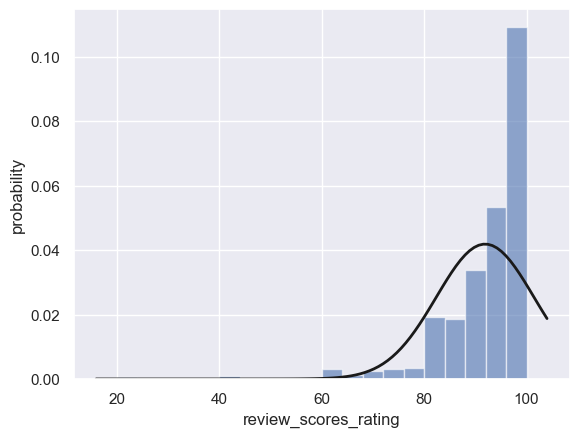

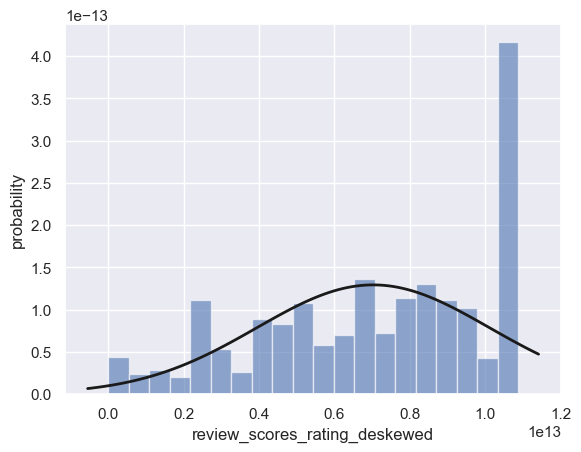

In [99]:
#Visualizing distribution of skewed and deskewed review_scores_rating
from scipy.stats import norm 

for col in ['review_scores_rating','review_scores_rating_deskewed']:
    sns.set(font_scale = 1)
    plt.figure()
    mu = listings[col].mean()
    std = listings[col].std()

    # Plot the histogram.
    plt.hist(listings[col], bins=20, density=True, alpha=0.6, color='b')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel(col)
    plt.ylabel('probability')

#### Observation
The deskewed review_scores_rating more closely matches the shape of a normal distribution curve, but the values cannot be interpreted

# Analysis of numerical columns

## Data cleaning

In [101]:
#Removing $ and % signs
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '').astype('float')
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype('float')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '').astype('float')

C:\Users\DanielJoseph.Onsiter\AppData\Local\Temp\ipykernel_27488\4169487785.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '').astype('float')
C:\Users\DanielJoseph.Onsiter\AppData\Local\Temp\ipykernel_27488\4169487785.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')


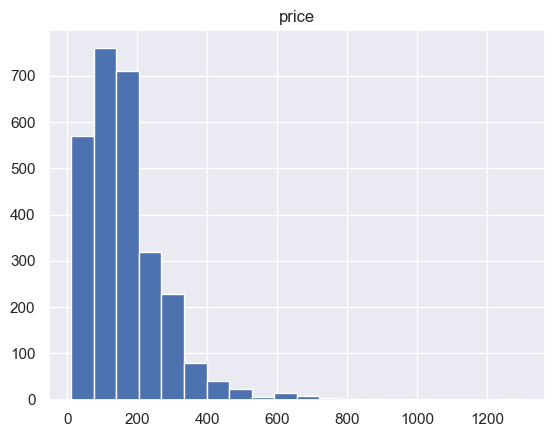

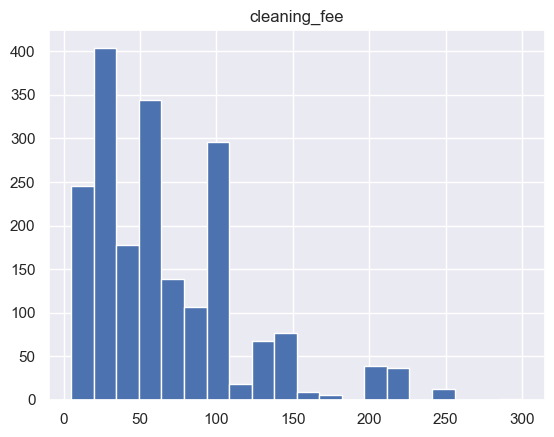

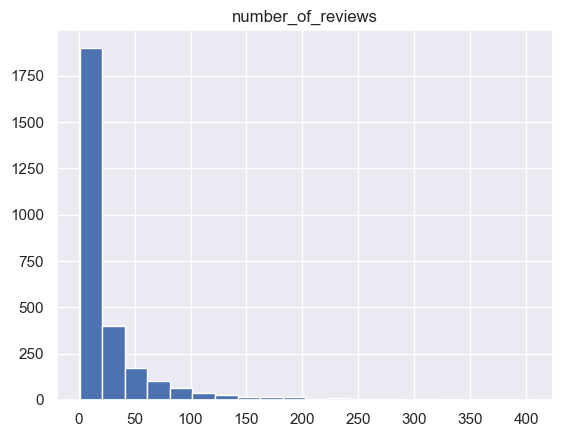

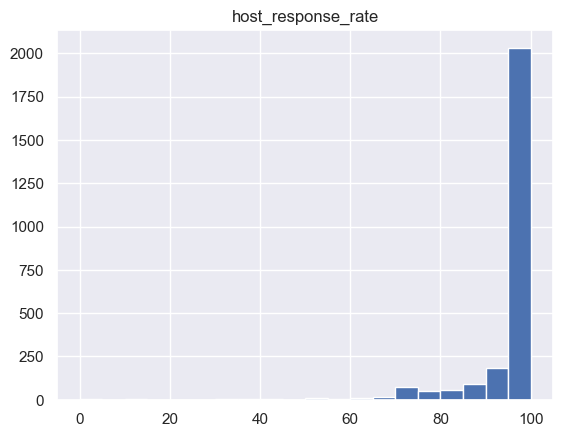

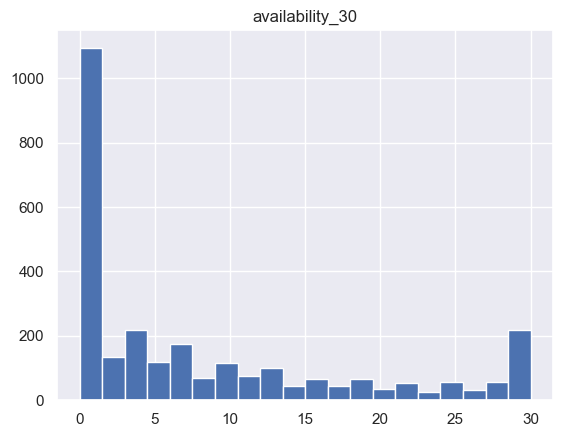

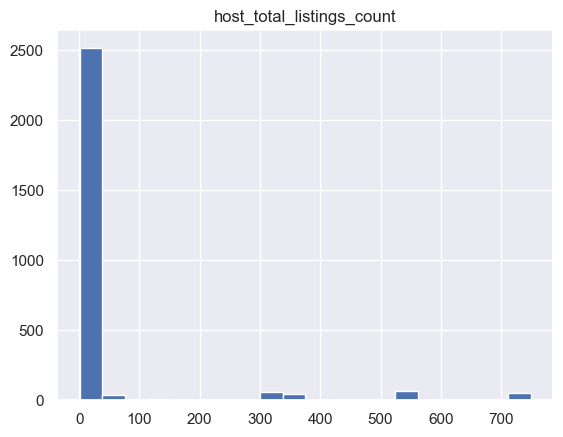

In [102]:
#plotting a few of the numerical values
for col in ['price','cleaning_fee','number_of_reviews','host_response_rate','availability_30','host_total_listings_count']:
    plt.figure()
    plt.hist(listings[col],bins=20)
    plt.title(col)

#### Observations

price: The shape is consistent with a lognormal plot

availability_30: Most listings have few days available in a month. Listings with lots of availability = listing with bad rating score?

host_total_listings_count: Most hosts have few listings. Are listings where the host has hundreds of other listings hotels/motels/chalets etc. ?

# Correlation plots

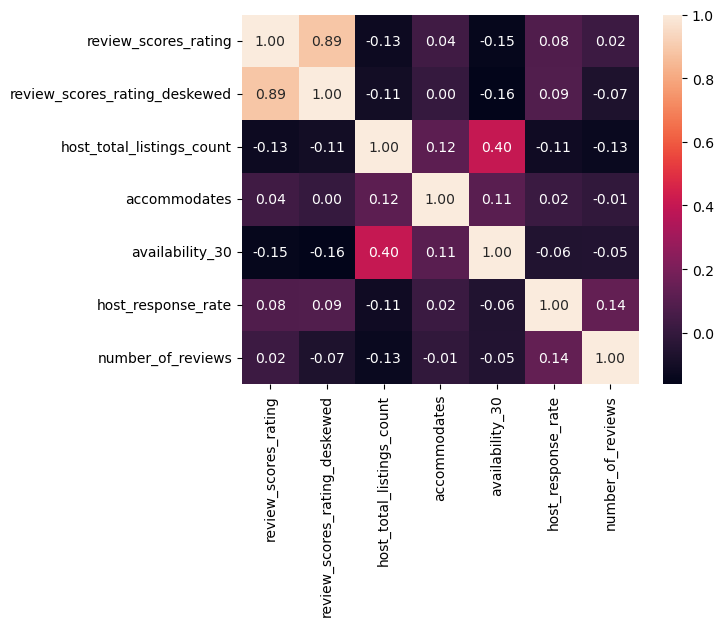

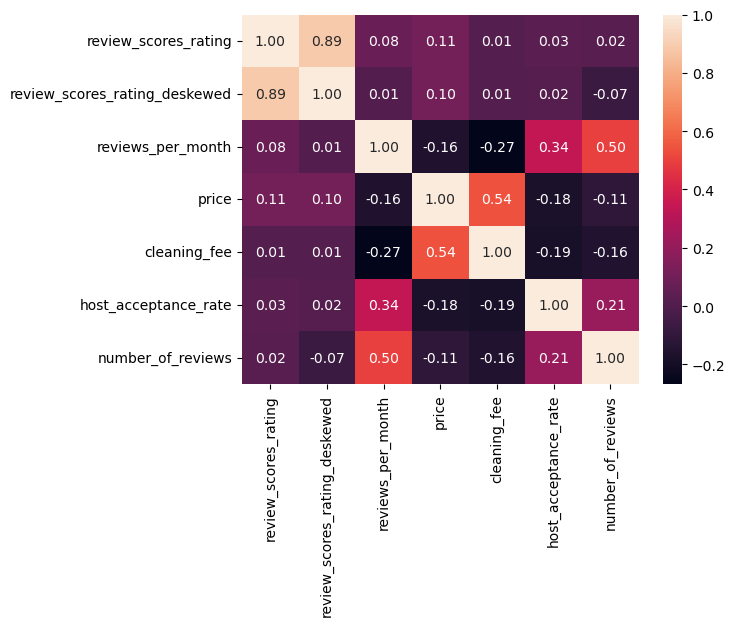

In [70]:
#Visualizing correlation plots for numerical variables

cols_to_look_at = ['host_total_listings_count', 'accommodates', 'availability_30', 'host_response_rate', 'number_of_reviews',\
                   'reviews_per_month','price', 'cleaning_fee', 'host_acceptance_rate','number_of_reviews']
for i in range(0,2):
    tmp = pd.concat([listings[['review_scores_rating','review_scores_rating_deskewed']],listings[cols_to_look_at[i*5:(i*5)+5]]],axis=1)
    plt.figure()
    sns.heatmap(tmp.corr(), annot=True, fmt=".2f");

#### Observations
Availability is likely to be caused by rating score (low ratings -> fewer guests -> increased availability) 

Features that have strongest correlation with review_scores_rating or deskewed review_scores_rating: 
number_of_reviews, reviews_per_month, price, host_total_listings_count, host_response_rate

# Figure for blog

In [55]:
#data cleaning
listings = pd.read_csv('listings.csv')
listings = listings[['review_scores_rating','host_total_listings_count',\
                     'host_response_rate',\
                     'number_of_reviews','price','reviews_per_month','accommodates','host_acceptance_rate','cleaning_fee']]

#Removing $ and % signs
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '').astype('float')
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype('float')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '').astype('float')

#Deskewing review_scores_rating
deskewed = stats.boxcox(listings['review_scores_rating'])[0]
listings.insert(1,'review_scores_rating_deskewed',deskewed)

C:\Users\DanielJoseph.Onsiter\AppData\Local\Temp\ipykernel_27488\1290094651.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$', '').astype('float')
C:\Users\DanielJoseph.Onsiter\AppData\Local\Temp\ipykernel_27488\1290094651.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype('float')


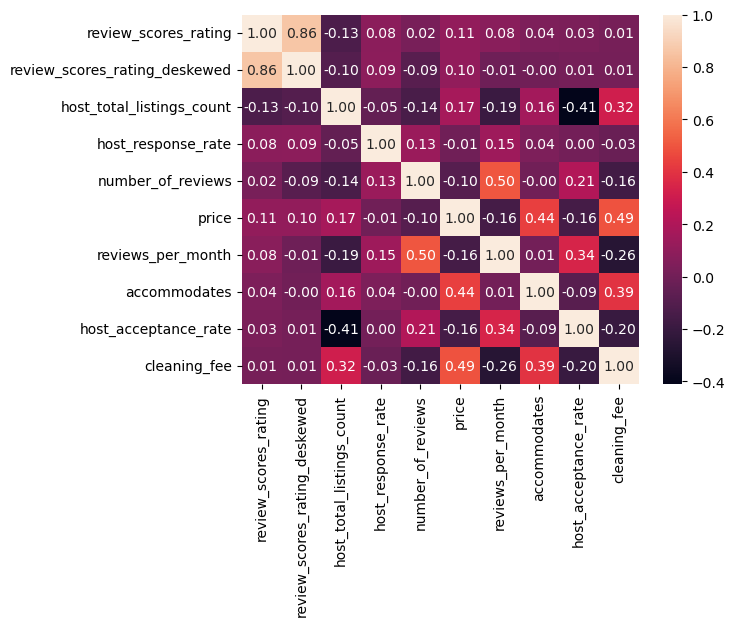

In [56]:
sns.heatmap(listings.corr(), annot=True, fmt=".2f");

# Analysis of categorical columns

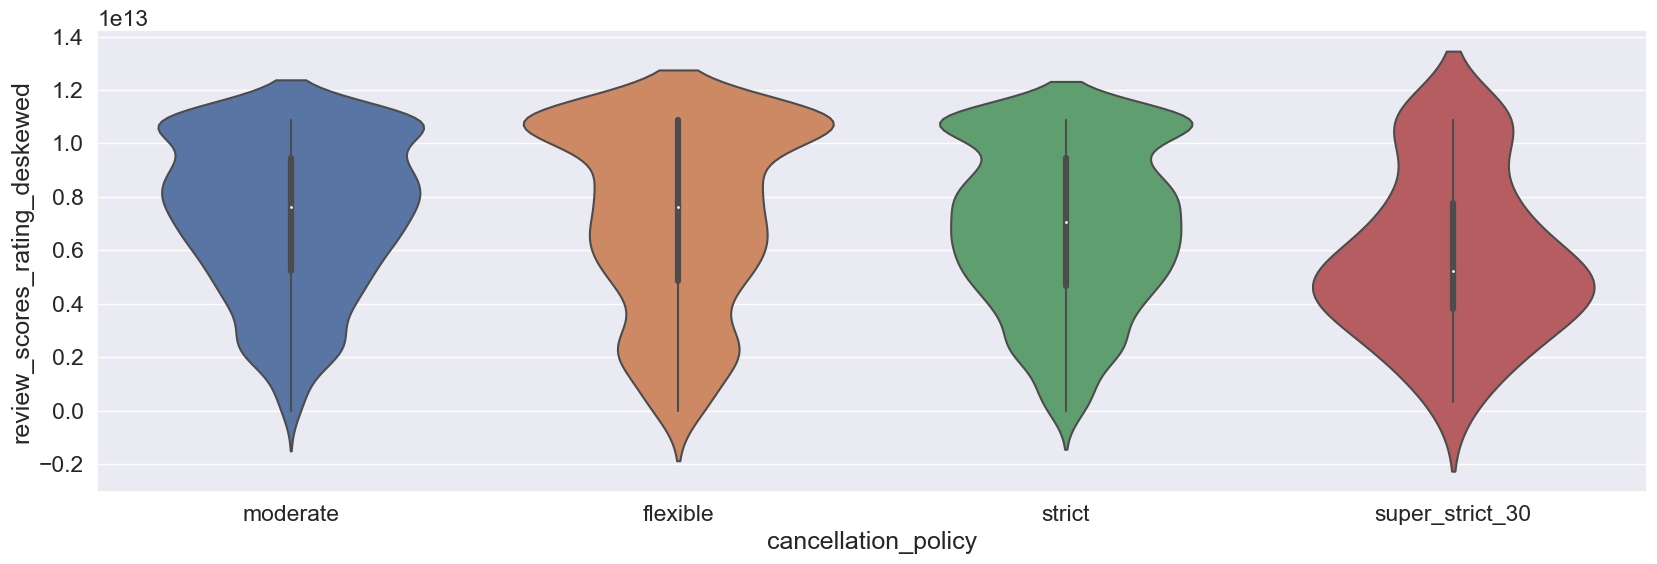

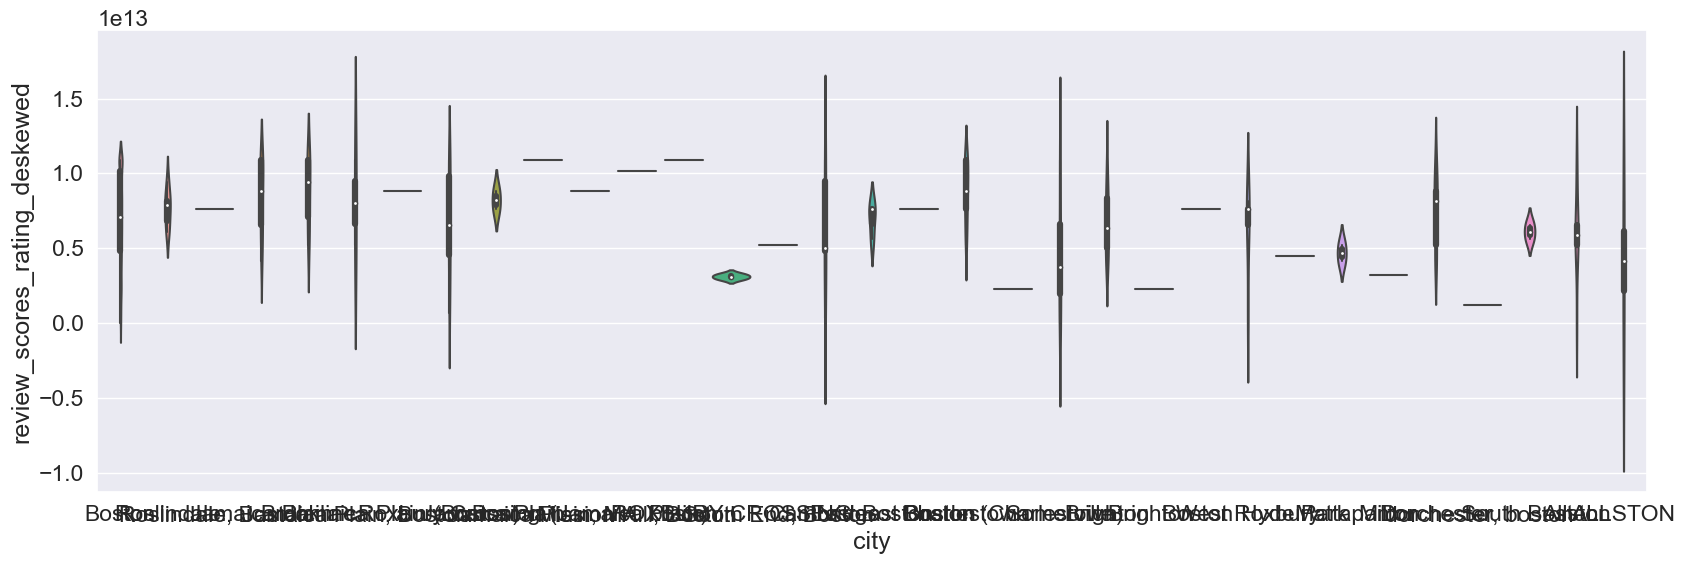

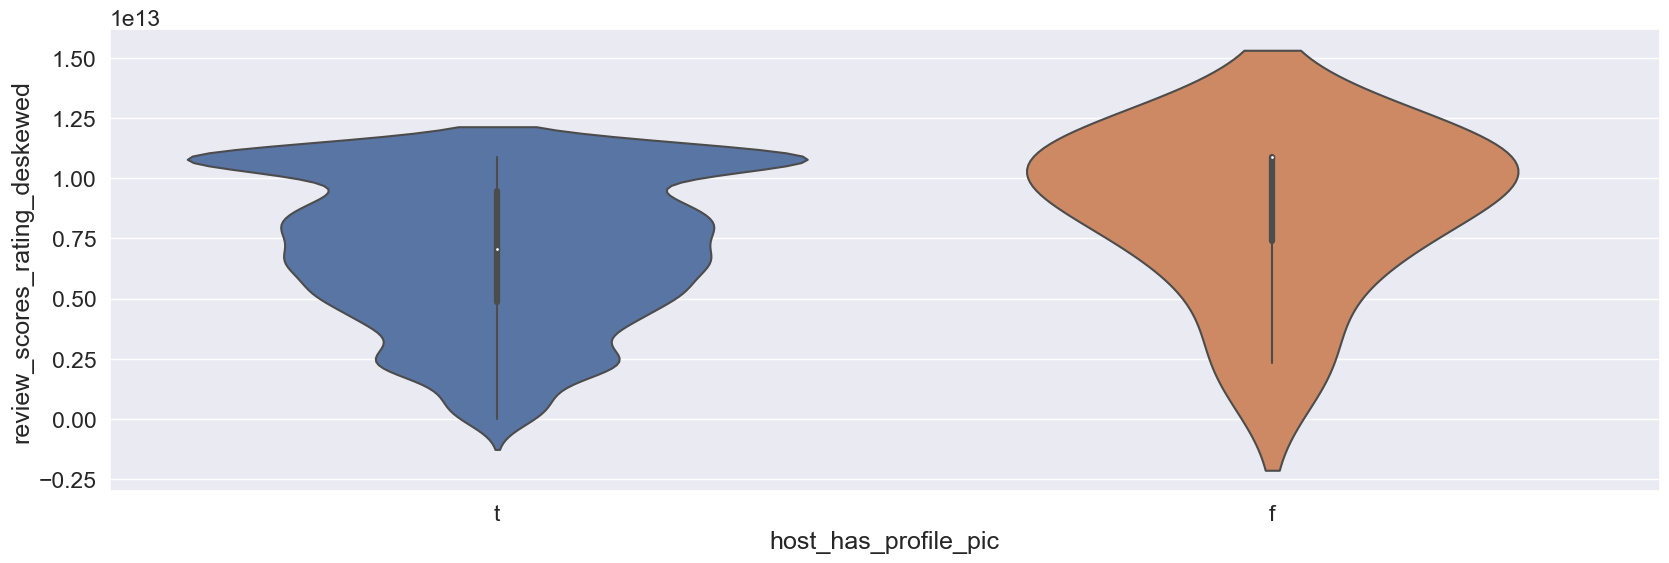

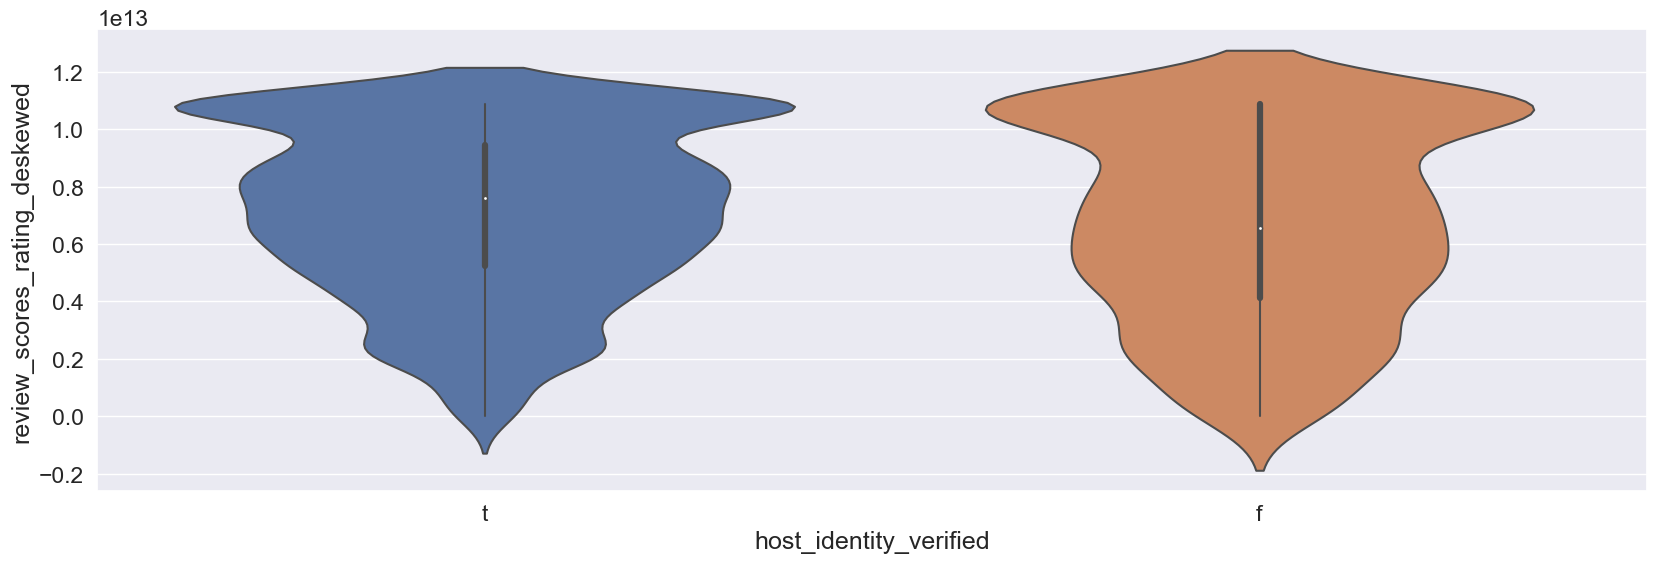

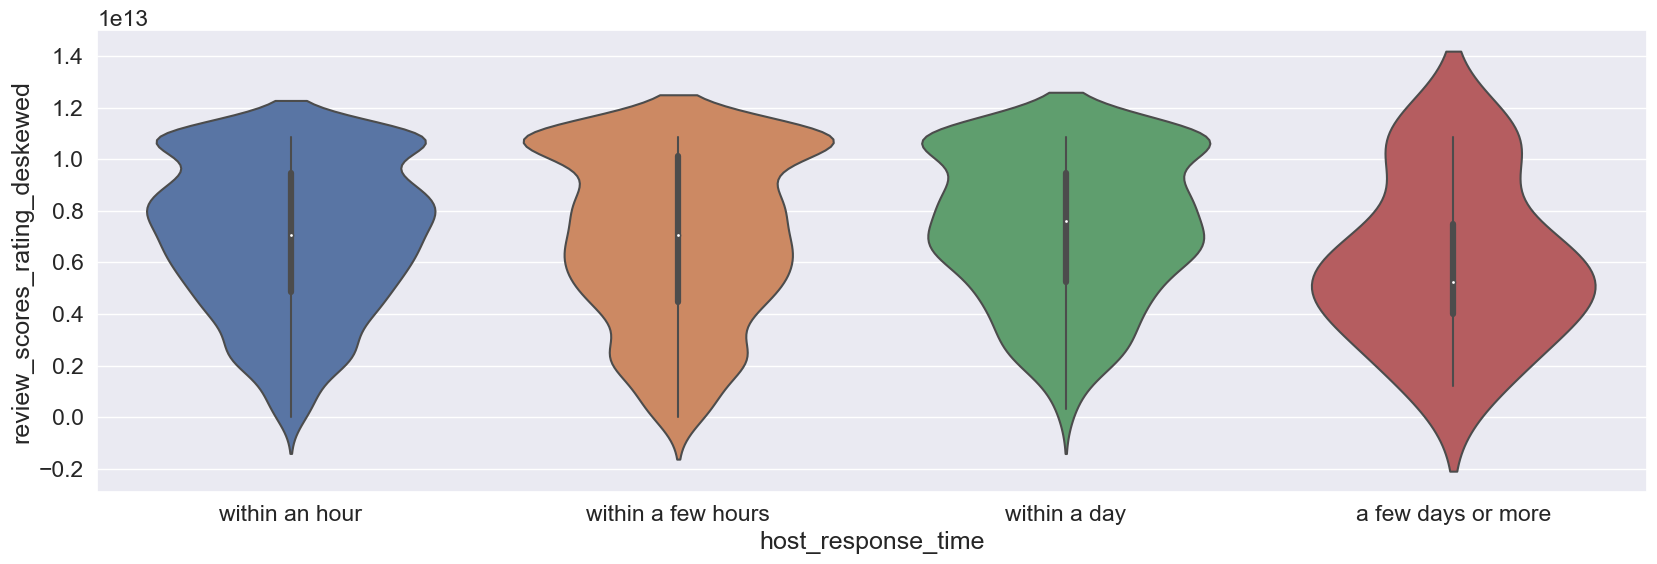

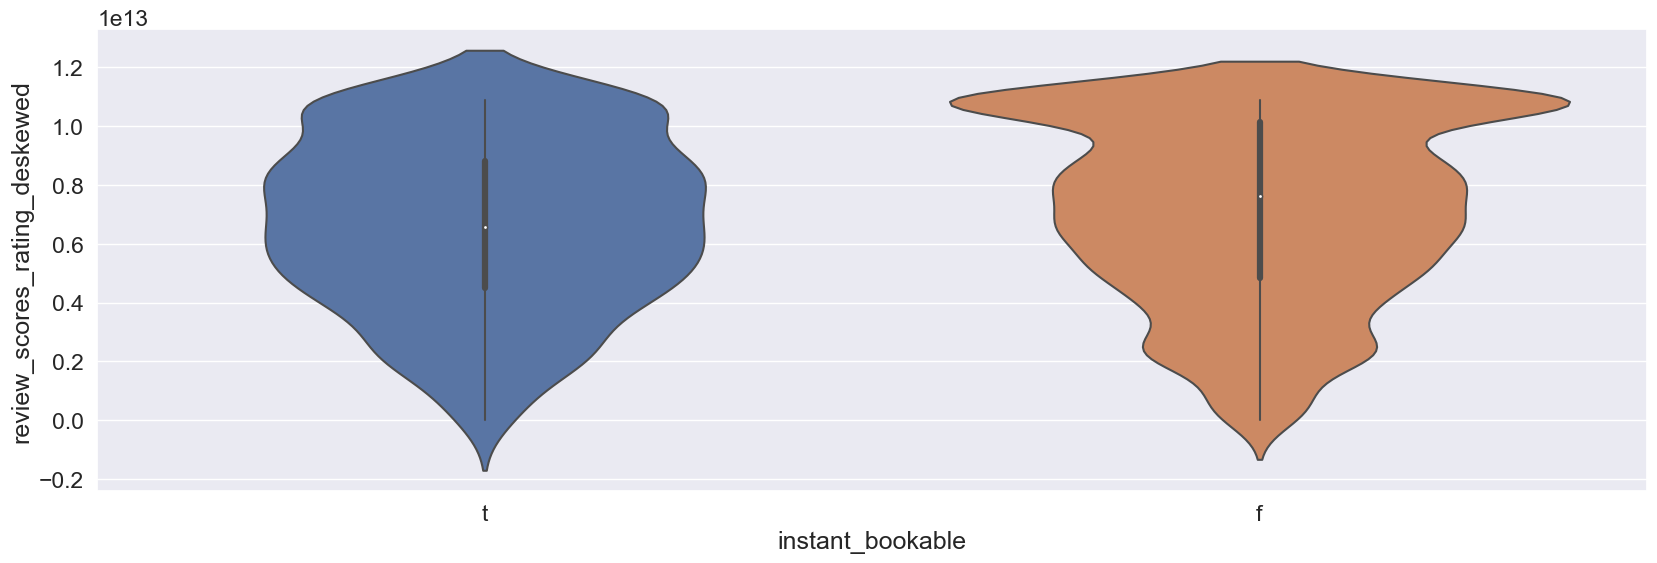

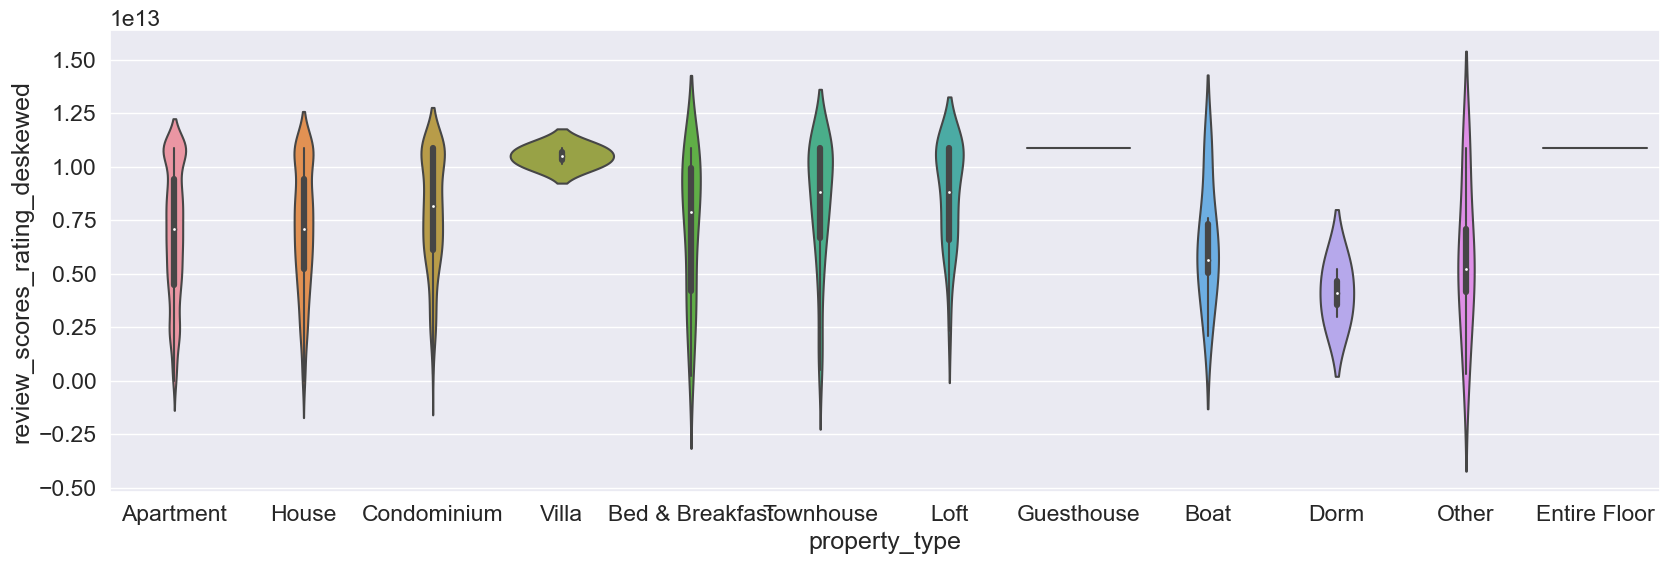

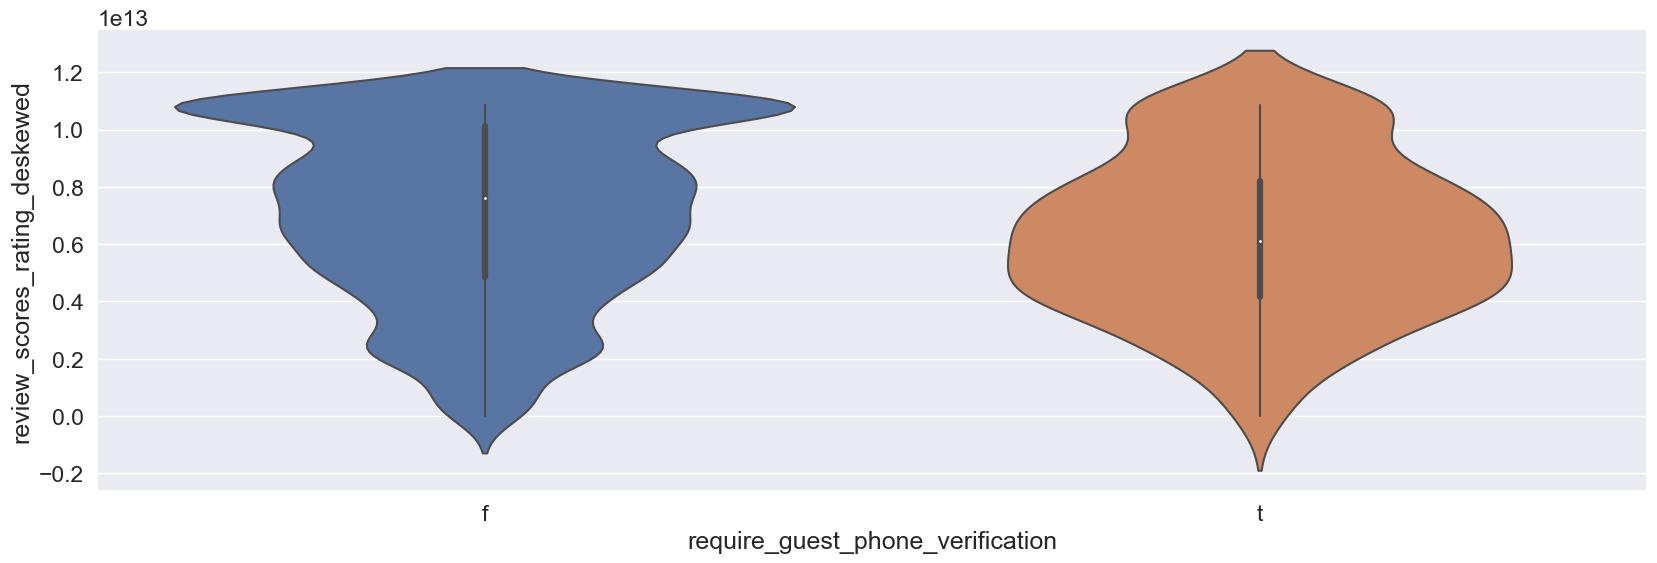

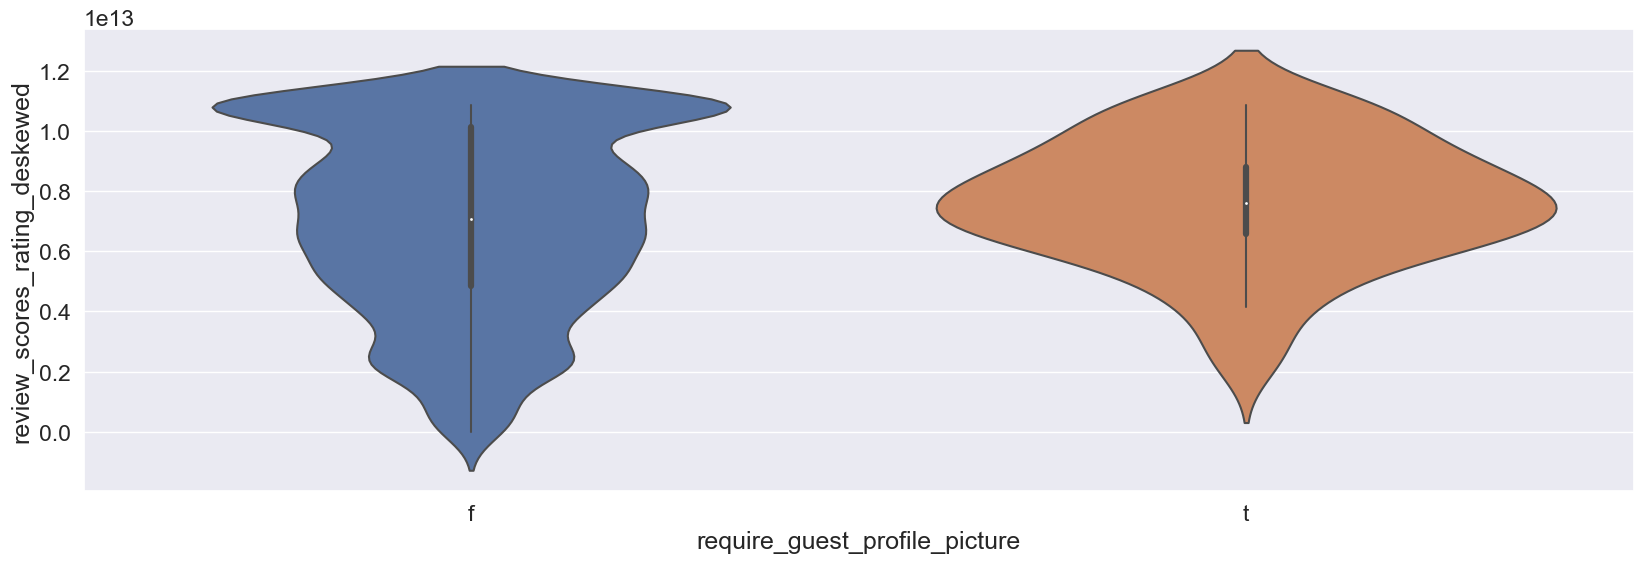

In [73]:
#Binary
listings = pd.read_csv('listings.csv')
listings = listings[['review_scores_rating',\
                     'host_identity_verified','instant_bookable','cancellation_policy',\
                    'host_response_time','property_type', 'host_has_profile_pic', 'city', 'require_guest_phone_verification',
                    'require_guest_profile_picture']]

#Drop NaNs
listings = listings.dropna(subset=['review_scores_rating'])

#Deskew
listings['review_scores_rating_deskewed'] = stats.boxcox(listings['review_scores_rating'])[0]

for col in listings.columns.difference(['review_scores_rating_deskewed','review_scores_rating']):
    plt.figure(figsize=(20,6))
    sns.set(font_scale = 1.5)
    ax = sns.violinplot(y='review_scores_rating_deskewed', 
                    x=col, 
                    data=listings)

## Counting categories for each feature of interest

In [76]:
pd.DataFrame(listings[['host_has_profile_pic']].value_counts())

,0
host_has_profile_pic,
t,2765
f,7


Should probably ignore, too few in false

In [77]:
pd.DataFrame(listings[['host_identity_verified']].value_counts())

,0
host_identity_verified,
t,2127
f,645


In [80]:
pd.DataFrame(listings[['require_guest_profile_picture']].value_counts())

,0
require_guest_profile_picture,
f,2707
t,65


In [81]:
pd.DataFrame(listings[['require_guest_phone_verification']].value_counts())

,0
require_guest_phone_verification,
f,2565
t,207


In [82]:
pd.DataFrame(listings[['property_type']].value_counts())

,0
property_type,
Apartment,1980
House,479
Condominium,177
Townhouse,46
Loft,32
Bed & Breakfast,30
Boat,11
Other,9
Dorm,2


#### Observations

host_response_time: long host response time and super strict cancellation policy negatively affect rating score

property_type: Looks like it might affect rating score at first, but the main property types: apartment, house, condominium, townhouse and loft have more or less similar distributions

host_has_profile_picture:  Doesn't really seem to affect rating score

require_guest_profile_picture and require_guest_phone_verification: Surprisingly have a big impact on rating. Do guests feel discriminated/feel worried for privacy reasons?